<a href="https://colab.research.google.com/github/joshualewin6/Colab-Notebook/blob/main/JoshLewiU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 2 Project:

## Quinn Ewers True Pass Completion Percentage
Quinn Ewers is the star QB for the Texas Longhorns' football team, and he has complete a lot of passes over the years, so let's calculate and the predict his true completion percentage using both math and data sampling.

We'll start by importing the necessary libraries:

In [1]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [2]:
import preliz as pz

In [3]:
import numpy as np
import arviz as az
import pymc as pm

##The Prior
We have plenty of prior information about Quinn Ewers; he's now in his 3rd season as the Longhorn's starting QB. I'm going to assume he's improving logarithmically, i.e., super qickly at first and by now a bit slower. We're not very confident about it, since he could be either much better or not so much at all, you never know in a new season of football, so we'll give it a relatively low weight: we'll use the data to predict 100 hypothetical passes, about only 3 games worth despite having two seasons of past data. So:

2022 season comp/att: 172/296

2023 season comp/att: 272/394

2024 season estimated comp/att: $(\frac{272}{394})^\frac{log(\frac{272}{394})}{log(\frac{172}{296})}≈78/100$

So, we can make our prior a probability distribution for this assumed completion rate for 100 passes:

$p(θ)=θ^{77}(1-θ)^{21}\frac{99!}{77!21!}$

<Axes: >

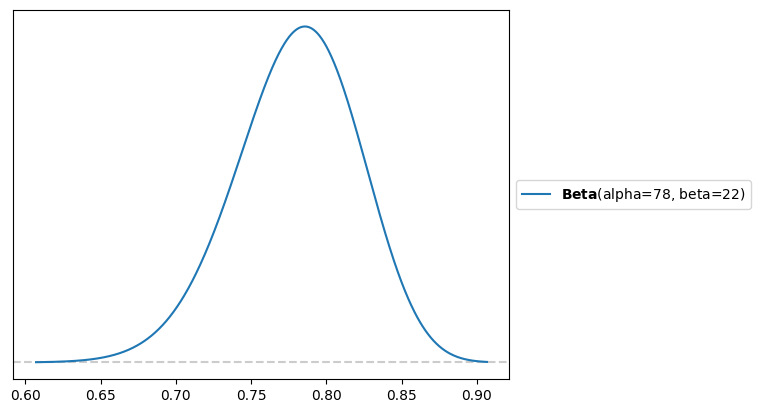

In [4]:
pz.Beta(alpha=78,beta=22).plot_pdf()

##The Likelihood
This uses our current and relevant data to make a binomial distrubution to graph the likely hood of the data ocurring given any probability θ. For our purposes, that's Quinn Ewers' passing data from the two games he's played this season, in which he's 44/63. Therefore:

$p(y|θ)=θ^{44}(1-θ)^{19}\frac{63!}{44!19!}$

<Axes: >

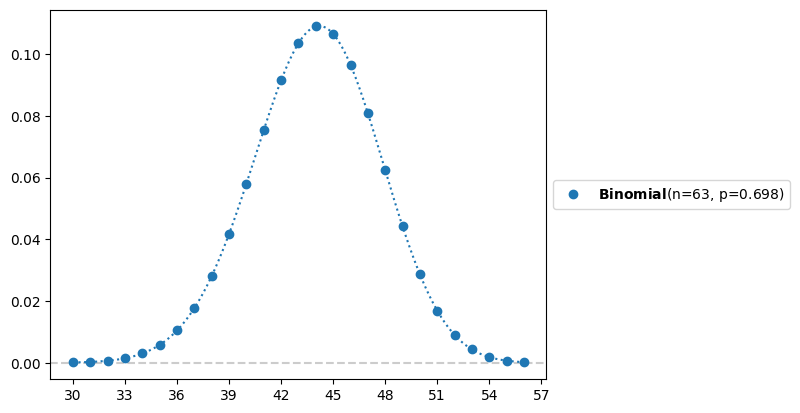

In [5]:
pz.Binomial(n=63,p=44/63).plot_pdf()

##Normalizing Constant
This is $p(y)$ the odds that Ewers would make and miss this combination of passes not given the prior. The easiest way to think about it though, is a number that the likelihood times the prior can be divided by to get a function whose integral from probabilities 0 to 1 is 1. This is $p(θ|y)$, the posterior, but more on that later. To calculate $p(y)$, then we must use the following formula:

$∫_{0}^{1}{p(y|θ)p(θ)dθ}=24.13716110605092$

##Posterior
Now it all comes together, since:

$p(θ|y)∝(y|θ)p(θ)$ and $∫_{0}^{1}{p(θ|y)dθ}=1$

This means $p(θ|y)$ is necessarily a beta distribution, so:

$p(θ|y)∝θ^{77+44}(1-θ)^{21+19}$ and so:

$p(θ|y)=θ^{121}(1-θ)^{40}\frac{162!}{121!40!}$

And we can plot accordingly:

<Axes: >

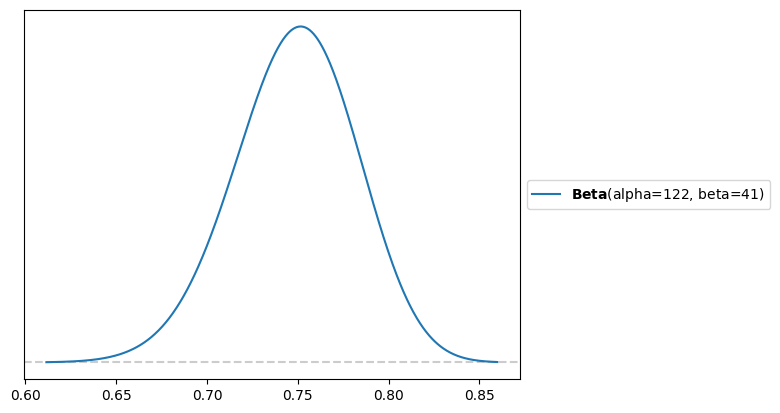

In [6]:
pz.Beta(alpha=122,beta=41).plot_pdf()

##The Estimated True Completion Percentage
We actually have various ways of calculating this, as we could take the median completion probability by calculating θ for:

$∫_0^θp(ϕ|y)d\phi-0.5=0$ to get $θ=0.74948$

(Yes, you have to substitute phi wherever theta is in the original integral or else the math doesn't work.)

Or we could calculate the most likely probability by calculating θ for:

$\frac{d}{dθ}p(θ|y)=0$ to get $θ=0.75155$

Probably the most useful solution, though, what we'll regard as Ewers' true completion percentage, is the expected probability, calculated by:

$∫_0^1θp(θ|y)dθ=0.74847$

So, Ewer's predicted true completion percentage for the rest of the 2024 season is 74.847%.

##The Model
We can use some of this, as well as numpy, arviz, and pymc, to draw samples based on the prior and posterior, allowing us to graph a distribution of his sample and calculate a true completon percentage distribution for Ewers based on our plot.

In [8]:
current_completion_data = np.repeat([1,0], repeats = [44,19])
with pm.Model() as ewers_completion_model:
  θ = pm.Beta('θ' , alpha = 78. , beta = 22.)
  y = pm.Bernoulli('y', p = θ, observed = current_completion_data)
  sample_completion_data = pm.sample(1000)

<Axes: title={'center': 'θ'}>

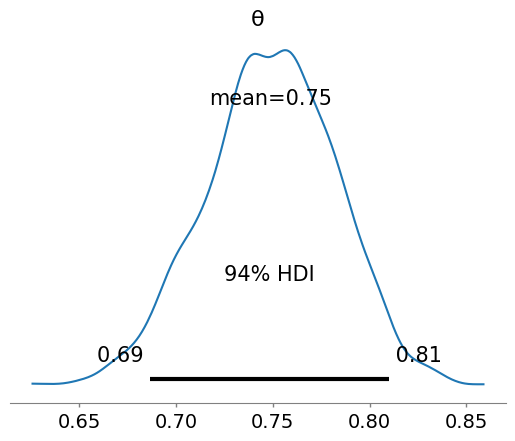

In [9]:
az.plot_posterior(sample_completion_data)

## In conclusion
And there you have it, that distribution is Ewers' true completion percentage. As for my own interperetaion, I think this model makes a good prediction, especially since he's maybe a little rusty out the gate, but he'll move up to his true percentage as the season progresses. I thought his stats at the start of this season would skew the probability much lower, but it was pretty close to my original posterior, so I'll accept 75% as Ewers' true completion percentage.